This notebook runs the experiments given in the paper and plots the results.

This assumes that the relevant source files for the three datasets have been placed in 'Resources/Sources'.

First, import the necessary functions.

In [1]:
%cd /home/ec2-user/PycharmProjects/PolarANNS
%pwd
from src.algos import *
from src.algos.factories import DataModelFactory, IndexFactory, MaskFactory
import main
volatile = False
import src.plotting
import src.testing

/home/ec2-user/PycharmProjects/PolarANNS


Obtain the three datasets and test the three datasets with varying code dimensions.

In [2]:
size_ds = 10000000
bigann_dm, bigann_dm_filename = DataModelFactory.get_datamodel(BIGANNDataModel, size_ds = size_ds, dim = BIGANNDataModel.BIGANN_DIM)
ydeep_dm, ydeep_dm_filename = DataModelFactory.get_datamodel(YandexDeepDataModel, size_ds = size_ds, dim = YandexDeepDataModel.YANDEX_DEEP_DIM)
ytti_dm, ytti_dm_filename = DataModelFactory.get_datamodel(YandexTTIDataModel, size_ds = size_ds, dim = YandexTTIDataModel.YANDEX_TTI_DIM)

Define some common parameters.

In [6]:
num_bits = 28
seed_list = list(range(1234, 1264))

In [7]:
dms = [bigann_dm, ydeep_dm, ytti_dm]
dm_names = [bigann_dm_filename, ydeep_dm_filename, ytti_dm_filename]

for dm, dm_name in zip(dms, dm_names):
    main.test_algos(dm,
                                 dm_name,
                                 num_bits_list = [num_bits],
                                 num_tables_list = [1],
                                 code_dim_list = [32, 64, 128, 256, 512, 1024],
                                 probe_size_list = [2 ** i for i in range(14)],
                                 seed_list = seed_list,
                                 do_pcnn = True,
                                 do_lsh = True,
                                 volatile = volatile,
                                 ephemeral = True)

test!
Filling index 0, starting time: 14:43:54
creating new index using 16 processes
Filled index 0, end time: 14:43:54
NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp: indexed table index 0
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=1
16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=2
16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=4
16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=8
16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=16
16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=32
16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=64
16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=128
16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=

/home/ec2-user/PycharmProjects/PolarANNS/src/testing.py:356: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  df = cls.read_dataframe(df_filename = df_filename)


TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=2
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=4
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=8
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=16
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=32
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=64
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=128
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=256
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=512
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=1024
TESTING: NoamLSH: num_bits=28, num_tables=1, seed=1234, embedding_class=hp, probe_size=2048
TESTIN

Now, we move on to the multiple table experiment on the YandexDeep dataset.

In [ ]:
pcnn_code_dim_list = [512]
pcnn_tables_list = [1,2]
lsh_tables_list = [1,2,4,8]
#evaluate pcnn
main.test_algos(ydeep_dm,
                         ydeep_dm_filename,
                         num_bits_list = [num_bits],
                         num_tables_list = pcnn_tables_list,
                         code_dim_list = pcnn_code_dim_list,
                         probe_size_list = [2 ** i for i in range(14)],
                         seed_list = seed_list,
                         do_pcnn = True,
                         volatile = volatile,
                         ephemeral = True)

#evaluate lsh
main.test_algos(ydeep_dm,
                         ydeep_dm_filename,
                         num_bits_list = [num_bits],
                         num_tables_list = lsh_tables_list,
                         probe_size_list = [2 ** i for i in range(14)],
                         seed_list = seed_list,
                         do_lsh = True,
                         volatile = volatile,
                         ephemeral = True)



Finally, generate the binary datasets and test PCNN and IBMH.


In [ ]:

for seed in seed_list:
    bin_dim = 512

    bin_datamodel, bin_dm_filename = DataModelFactory.get_datamodel(BinarizedDataModel, real_dm=ydeep_dm, dim=bin_dim, seed=seed)
    #run IBMH
    main.test_algos(bin_datamodel, bin_dm_filename,
                          num_bits_list = [num_bits],
                          num_tables_list = [1,2,4,8, 16],
                          num_flips_list = list(range(6)),
                          do_faiss_lsh = True,
                          volatile = volatile,
                          ephemeral = True)
    #run PCNN
    main.test_algos(bin_datamodel, bin_dm_filename,
                          num_bits_list = [num_bits],
                          num_tables_list = [1],
                          code_dim_list = [512],
                          probe_size_list = [2 ** i for i in range(14)],
                          do_faiss_lsh = True,
                          volatile = volatile,
                          ephemeral = True)

The measurement results are now in the dataframes. We proceed to plotting the graphs.

In [8]:
import matplotlib.pyplot as plt
PLOT_PATH = 'output_plots/'
def common_plt():
    plt.xlim(20, 15000)
    plt.ylim(0.2, 1.0)
    plt.xlabel('distance computations per query', fontsize=16)
    plt.ylabel('recall', fontsize=16)

    #remove title and subtitle for this plot
    plt.title("")
    plt.suptitle("")

    #show grid
    plt.grid()

Plot varying code_dim

/home/ec2-user/PycharmProjects/PolarANNS/src/main.py:715: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs.append(ResultDF.read_dataframe(df_filename=df_filename))


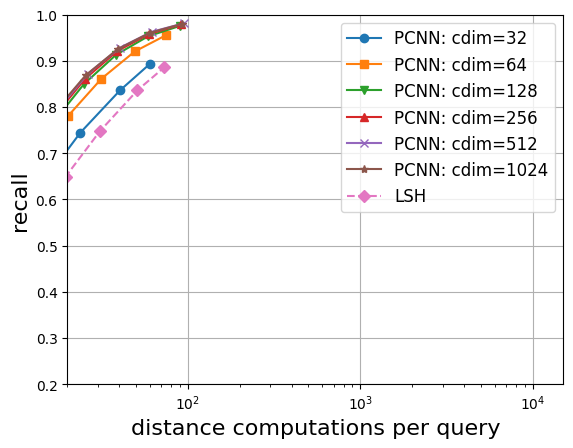

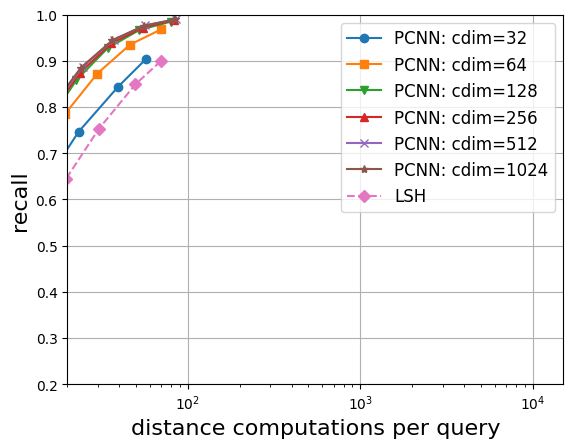

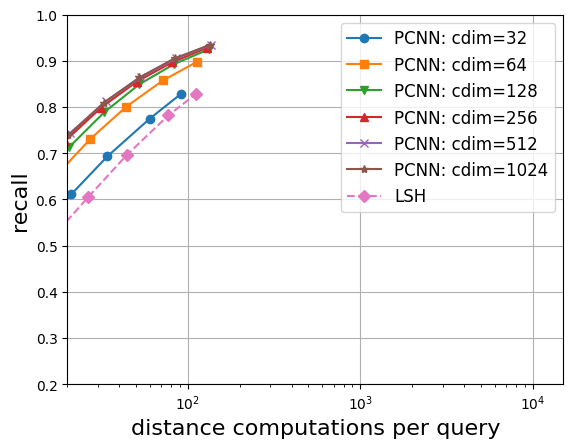

In [9]:
dms = [ydeep_dm, bigann_dm, ytti_dm]
names = ['YandexDeep', 'BIGANN', 'YandexTTI']
filenames = ['yandexdeep_average.png', 'bigann_average.png', 'yandextti_average.png']
alphas = [1.4, 1.4, 2.0]
for real_dm, dm_name, alpha, filename in zip(dms, names, alphas, filenames):
    params = real_dm.get_params()
    size_nn = 1
    plt.clf()
    main.plot_average_recall([params], min_count=30,
                        alpha_list=[alpha],
                        size_nn_list=[size_nn],
                        num_bits_list=[28],
                        num_tables_list=[1],
                        pretty=True,
                        legend=  True,
                        use_dashes = True,
                        use_markers = True,
#                         condition_list=[lambda c: c['probe_size'] <=512],
                        embedding_class_list=['hp'],
                        prrot_iters_list=[None],
                        code_dim_list=[32, 64, 128, 256, 512, 1024],
                        do_pcnn=True,
                        do_lsh = True,
                        title = f'{dm_name}: size_nn={size_nn}, $\\alpha={alpha}$',
                        do_faiss_lsh=False)
    #same x limit for all plots
    common_plt()

    plt.legend(loc='best', prop={'size': 12})
    plt.show()

Varying num_tables

In [ ]:
dm_name = 'YandexDeep'

params = ydeep_dm.get_params()
alpha = 1.4
size_nn_list = [1, 50]
filenames = ['yandexdeep_multiple_tables.png', 'yandexdeep_multiple_tables_sizenn50.png']
for size_nn, filename in zip(size_nn_list, filenames):
    main.plot_average_recall([params], min_count=1,
                        alpha_list=[alpha],
                        size_nn_list=[size_nn],
                        num_bits_list=[28],
                        num_tables_list=[1,2,4,8],
    #                     seed_list = list(range(1234, 1264)),
                        pretty=True,
                        legend=  True,
                        embedding_class_list=['hp'],
                        prrot_iters_list=[None],
                        code_dim_list=[512],
                        do_pcnn=True,
                        do_lsh = True,
                        use_markers = True,
                        title = f'{dm_name}: size_nn={size_nn}, $\\alpha={alpha}$',
                        do_faiss_lsh=False)

    plt.xlim(20, 15000)
    plt.ylim(0.2, 1.0)
    plt.xlabel('distance computations per query', fontsize=16)
    plt.ylabel('recall', fontsize=16)

    #remove title and subtitle for this plot
    plt.title("")
    plt.suptitle("")

    #show grid
    plt.grid()
    plt.legend(loc='best', fontsize=10)

    plt.show()

Binary datasets

In [ ]:
dm_list = [BinarizedDataModel(dim = 512, real_dm = ydeep_dm, seed = i) for i in range(1234, 1264)]
param_list = [dm.get_params() for dm in dm_list]
alpha = 1.4
size_nn = 1
plt.clf()
main.plot_average_recall(param_list,
                    title = f"YandexDeep: size_nn={size_nn}, $\\alpha={alpha}$",
                    min_count = 30,
                    alpha_list=[alpha],
                    size_nn_list=[size_nn],
                    num_bits_list=[28],
                    num_tables_list=[1,2,4,8,16],
                    pretty = True,
                    use_markers = True,
                    # embedding_class_list=['hp'],
                    # prrot_iters_list=[None],
                    code_dim_list=[512],
                    do_pcnn=True,
                    do_faiss_lsh=True)
common_plt()
plt.legend(loc='best', prop={'size': 12})
plt.show()

Varying approximation factor (alpha)

/home/ec2-user/PycharmProjects/PolarANNS/src/main.py:715: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs.append(ResultDF.read_dataframe(df_filename=df_filename))
/home/ec2-user/PycharmProjects/PolarANNS/src/main.py:715: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs.append(ResultDF.read_dataframe(df_filename=df_filename))
/home/ec2-user/PycharmProjects/PolarANNS/src/main.py:715: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs.append(ResultDF.read_dataframe(df_filename=df_filename))
/home/ec2-user/PycharmProjects/PolarANNS/src/main.py:715: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs.append(ResultDF.read_dataframe(df_filename=df_filename))


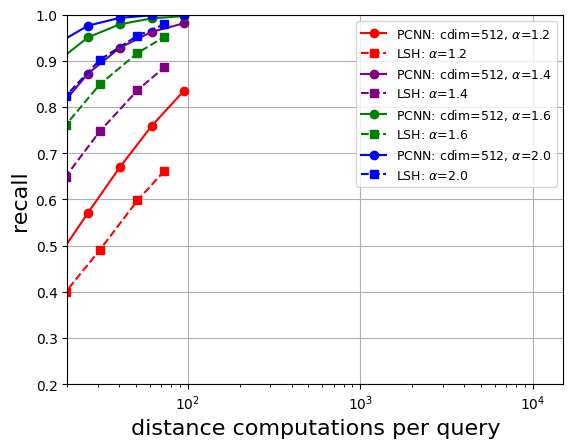

In [10]:

dm_name = 'YandexDeep'

params = ydeep_dm.get_params()
alpha_list = [1.2, 1.4, 1.6, 2.0]
color_list = ['r', 'purple', 'g', 'b']
size_nn = 1
for alpha, color in zip(alpha_list, color_list):
    main.plot_average_recall([params], min_count=1,
                        alpha_list=[alpha, 0],
                        size_nn_list=[size_nn],
                        num_bits_list=[28],
                        num_tables_list=[1],
#                         seed_list = list(range(1234, 1264)),
                        pretty=True,
                        legend=  True,
                        embedding_class_list=['hp'],
                        prrot_iters_list=[None],
                        code_dim_list=[512],
                        do_pcnn=True,
                        do_lsh = True,
                        use_markers = True,
                        color= color,
                        title = f'{dm_name}: size_nn={size_nn}, $\\alpha\\in${{{",".join(map(str, alpha_list))}}}',
                        do_faiss_lsh=False)

common_plt()
plt.legend(loc='best', prop={'size': 9})
plt.show()

Varying nearest neighbor size (size_nn)

/home/ec2-user/PycharmProjects/PolarANNS/src/main.py:715: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs.append(ResultDF.read_dataframe(df_filename=df_filename))
/home/ec2-user/PycharmProjects/PolarANNS/src/main.py:715: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs.append(ResultDF.read_dataframe(df_filename=df_filename))
/home/ec2-user/PycharmProjects/PolarANNS/src/main.py:715: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  dfs.append(ResultDF.read_dataframe(df_filename=df_filename))


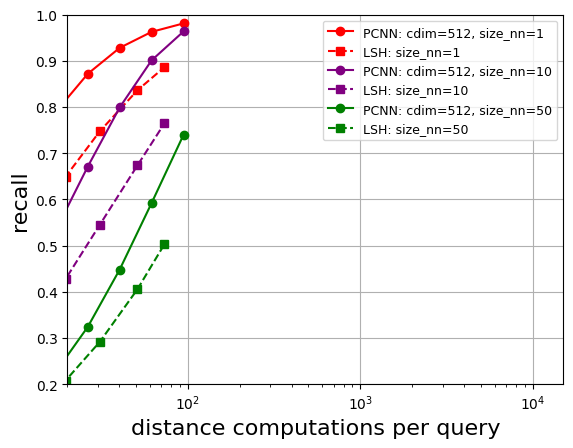

In [11]:
dm_name = 'YandexDeep'

params = ydeep_dm.get_params()
alpha = 1.4
size_nn_list = [1, 10, 50]
color_list = ['r', 'purple', 'g']
plt.clf()
for size_nn, color in zip(size_nn_list, color_list):
    main.plot_average_recall([params], min_count=1,
                        alpha_list=[alpha],
                        size_nn_list=[size_nn, 0],
                        num_bits_list=[28],
                        num_tables_list=[1],
                        pretty=True,
                        legend=  True,
                        embedding_class_list=['hp'],
                        prrot_iters_list=[None],
                        code_dim_list=[512],
                        do_pcnn=True,
                        do_lsh = True,
                        use_markers = True,
                        color = color,
                        title = f'{dm_name}: size_nn$\in${{{",".join(map(str,size_nn_list))}}}, $\\alpha={alpha}$',
                        do_faiss_lsh=False)

common_plt()
plt.legend(loc='best', prop={'size': 9})

plt.show()

Embedding variance difference between PCNN and LSH

In [ ]:
dm_name = 'YandexDeep'

params = ydeep_dm.get_params()
alpha = 1.4
size_nn = 1
main.plot_average_recall([params], min_count=1,
                    alpha_list=[alpha],
                    size_nn_list=[size_nn],
                    num_bits_list=[28],
                    num_tables_list=[1],
                    seed_list = list(range(1234, 1264)),
#                     condition_list=[lambda c: c['probe_size'] <=512],
                    pretty=True,
                    legend=  False,
                    embedding_class_list=['hp'],
                    prrot_iters_list=[None],
                    code_dim_list=[1024],
                    do_pcnn=True,
                    do_lsh = False,
                    title = f'{dm_name}: size_nn={size_nn}, $\\alpha={alpha}$ (PCNN)',
                    do_faiss_lsh=False)
plt.xlim(20, 15000)
plt.ylim(0.2, 1.0)

plt.xlabel('distance computations per query', fontsize=16)
plt.ylabel('recall', fontsize=16)

#remove title and subtitle for this plot
plt.title("")
plt.suptitle("")

#show grid
plt.grid()

plt.show()
main.plot_average_recall([params], min_count=1,
                    alpha_list=[alpha],
                    size_nn_list=[size_nn],
                    num_bits_list=[28],
                    num_tables_list=[1],
                    seed_list = list(range(1234, 1264)),
#                     condition_list=[lambda c: c['probe_size'] <=512],
                    pretty= True,
                    legend= False,
                    use_dashes = False,
                    embedding_class_list=['hp'],
                    prrot_iters_list=[None],
                    do_pcnn=False,
                    do_lsh = True,
                    title = f'{dm_name}: size_nn={size_nn}, $\\alpha={alpha}$ (LSH)')

plt.xlim(20, 15000)
plt.ylim(0.2, 1.0)
plt.xlabel('distance computations per query', fontsize=16)
plt.ylabel('recall', fontsize=16)

#remove title and subtitle for this plot
plt.title("")
plt.suptitle("")

#show grid
plt.grid()

plt.show()

Convex Frontier

In [ ]:
dm_name = 'YandexDeep'

params = ydeep_dm.get_params()
alpha = 1.4
size_nn = 1
main.plot_average_recall([params],
                title = f"YandexDeep - Convex Frontier: size_nn={size_nn}, $\\alpha={alpha}$",
                alpha_list=[alpha],
                size_nn_list=[size_nn],
                num_bits_list=[28],
                num_tables_list=[1],
                seed_list = list(range(1234, 1264)),
                pretty=True,
                legend=  False,
                embedding_class_list=['hp'],
                prrot_iters_list=[None],
                do_pcnn=False,
                color = 'y',
                do_lsh = True)

main.plot_frontier_recall([params],
                title = f"YandexDeep - Convex Frontier: size_nn={size_nn}, $\\alpha={alpha}$",
                alpha_list=[alpha],
                size_nn_list=[size_nn],
                num_bits_list=[28],
                num_tables_list=[1],
#                 seed_list = list(range(1234, 1264)),
                pretty=True,
                legend=  False,
                use_dashes = False,
                embedding_class_list=['hp'],
                prrot_iters_list=[None],
                do_pcnn=False,
                color = 'b',
                do_lsh = True)
common_plt()
plt.show()

main.plot_frontier_recall([params],
                title = f"YandexDeep - Convex Frontier: size_nn={size_nn}, $\\alpha={alpha}$",
                 alpha_list=[alpha],
                size_nn_list=[size_nn],
                num_bits_list=[28],
                num_tables_list=[1],
                pretty=True,
                legend=  True,
                use_dashes = False,
                embedding_class_list=['hp'],
                prrot_iters_list=[None],
                code_dim_list=[32, 64, 128, 256, 512, 1024],
                do_pcnn=True,
                do_lsh = True)
common_plt()
plt.legend(loc='best', prop={'size': 12})
plt.show()

main.plot_frontier_recall([params],
                title = f"YandexDeep - Convex Frontier: size_nn={size_nn}, $\\alpha={alpha}$",
                alpha_list=[alpha],
                size_nn_list=[size_nn],
                num_bits_list=[28],
                num_tables_list=[1,2,4,8],
                pretty=True,
                legend=  True,
                use_dashes = False,
                embedding_class_list=['hp'],
                prrot_iters_list=[None],
                code_dim_list=[512],
                do_pcnn=True,
                do_lsh = True)
common_plt()
plt.legend(loc='best', prop={'size': 12})
plt.show()

Approximate embedding based on fast Johnson-Lindenstrauss transform

In [ ]:

dm_name = 'YandexDeep'

params = ydeep_dm.get_params()
alpha = 1.4
size_nn = 1
main.plot_average_recall([params],
                    title = f"YandexDeep: size_nn={size_nn}, $\\alpha={alpha}$",
                    alpha_list=[alpha],
                    size_nn_list=[size_nn],
                    num_bits_list=[28],
                    num_tables_list=[1],
                    pretty=True,
                    code_dim_list = [512],
                    legend=  True,
                    use_markers = True,
                    embedding_class_list=['hp', 'shp'],
                    prrot_iters_list=[None, 3,4,5],
                    do_pcnn=True,
                    do_lsh = True)
common_plt()
plt.legend(loc='best', prop={'size': 9})
plt.show()

Run tests with autoencoder LSH

In [ ]:
main.test_algos(ydeep_dm,
                    ydeep_dm_filename,
                    num_bits_list = [28],
                    num_tables_list = [1, 2, 4, 8],
                    code_dim_list = [32],
                    probe_size_list = [2 ** i for i in range(13)],
                    seed_list = [42],
                    embedding_class_list = ['ssrae'],
                    do_pcnn = False,
                    do_lsh = True,
                    volatile = False,
                    ephemeral = False)

main.test_algos(ydeep_dm,
                    ydeep_dm_filename,
                    num_bits_list = [28],
                    num_tables_list = [1, 2],
                    code_dim_list = [512],
                    probe_size_list = [2 ** i for i in range(14)],
                    seed_list = [42],
                    embedding_class_list = ['ssrae'],
                    do_pcnn = True,
                    do_lsh = False,
                    volatile = False,
                    ephemeral = False)

main.test_algos(ydeep_dm,
                    ydeep_dm_filename,
                    num_bits_list = [28],
                    num_tables_list = [1],
                    code_dim_list = [32, 64, 128, 256, 1024],
                    probe_size_list = [2 ** i for i in range(14)],
                    seed_list = [42],
                    embedding_class_list = ['ssrae'],
                    do_pcnn = True,
                    do_lsh = False,
                    volatile = False,
                    ephemeral = False)

Plot comparison with various cdim values for autoencoder LSH

In [ ]:
alpha = 1.4
params = ydeep_dm.get_params()
size_nn = 1
plt.clf()
dm_filename = DataModelFactory.get_dm_filename_from_params(params)
df_filename = main.get_df_from_dm_filename(dm_filename)
main.plot_average_recall([params], min_count=1,
                    alpha_list=[alpha],
                    size_nn_list=[size_nn],
                    num_bits_list=[28],
                    num_tables_list=[1],
                    pretty=True,
                    legend=  True,
                    use_dashes = True,
                    use_markers = True,
                    seed_list = [42],
                    embedding_class_list=['ssrae'],
                    prrot_iters_list=[None],
                    code_dim_list=[32, 64, 128, 256, 512, 1024],
                    do_pcnn=True,
                    do_lsh = True,
#                     title = f'{dm_name}: size_nn={size_nn}, $\\alpha={alpha}$',
                    do_faiss_lsh=False)
#same x limit for all plots
common_plt()
plt.legend(loc='best', prop={'size': 8})
plt.show()

Plot comparison with various ntable values for autoencoder LSH

In [ ]:
alpha = 1.4
params = ydeep_dm.get_params()
size_nn = 1
plt.clf()
dm_filename = DataModelFactory.get_dm_filename_from_params(params)
df_filename = main.get_df_from_dm_filename(dm_filename)

main.plot_average_recall([params], min_count=1,
                    alpha_list=[alpha],
                    size_nn_list=[size_nn],
                    num_bits_list=[28],
                    num_tables_list=[1,2],
                    pretty=True,
                    legend=  True,
                    use_dashes = True,
                    use_markers = True,
                    seed_list = [42],
                    embedding_class_list=['ssrae'],
                    prrot_iters_list=[None],
                    code_dim_list=[512],
                    do_pcnn=True,
                    do_lsh = False,
                    do_faiss_lsh=False)

main.plot_average_recall([params], min_count=1,
                    alpha_list=[alpha],
                    size_nn_list=[size_nn],
                    num_bits_list=[28],
                    num_tables_list=[1,2,4,8],
                    pretty=True,
                    legend=  True,
                    use_dashes = True,
                    use_markers = True,
                    seed_list = [42],
                    embedding_class_list=['ssrae'],
                    prrot_iters_list=[None],
                    code_dim_list=[512],
                    do_pcnn=False,
                    do_lsh = True,
                    do_faiss_lsh=False)


#same x limit for all plots
common_plt()
plt.legend(loc='best', prop={'size': 8})
plt.show()